In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import seaborn as sns
sns.set(style='ticks', font_scale=1.5)

In [10]:
def gradient(y, t, h, ε, K):
    R, N = y
    dRdt = -h*R*N/(R+K)
    dNdt = ε*h*R*N/(R+K)
    return dRdt, dNdt

def monod_growth(t, R0, N0, h, ε, K):
    return odeint(gradient, (R0, N0), t, (h, ε, K))

In [93]:
def fit_expo(t, N, k=9):
    r, logN0 = np.polyfit(t[:k], np.log(N[:k]), deg=1)
#     plt.plot(t, np.log(N)-logN0)
#     plt.plot(t, r*t, '--')
    return r

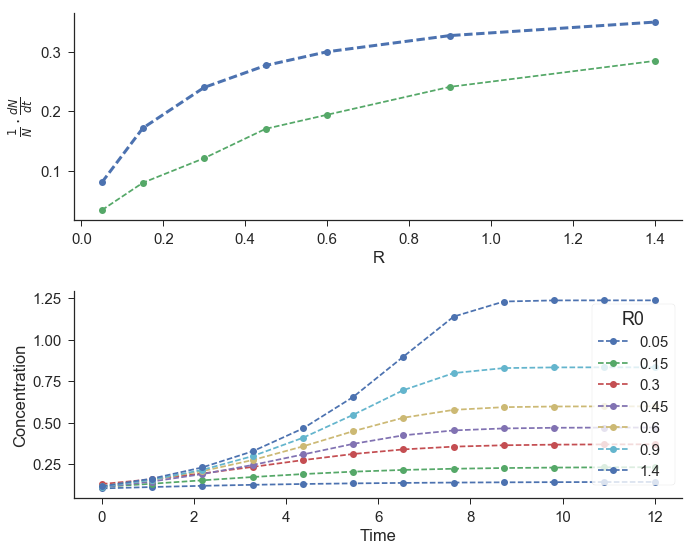

In [96]:
t = np.linspace(0, 12, 12)
R0s = np.array([0.05, 0.15, 0.3, 0.45, 0.6, 0.9, 1.4])
N0 = 0.1
h = 0.5
ε = 0.8
K = 0.2
rs = []

fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=False, sharey=False)

ax = axes[1]
for R0 in R0s:
    y = monod_growth(t, R0, N0, h, ε, K)
    R, N = y[:,0], y[:,1]
    N += np.random.normal(0, 0.01)
#     ax.plot(t, R, '--', label='R')
    ax.plot(t, N, '--o', label=R0)
    rs.append( fit_expo(t, N) )

ax.set(
    xlabel='Time',
    ylabel='Concentration',
#     yscale='log'
)
ax.legend(title='R0', loc='center right', frameon=True)

axes[0].plot(R0s, R0s*ε*h/(R0s+K), 'o--', lw=3, label='Real')
axes[0].plot(R0s, rs, 'o--', label='Approx')
axes[0].set(xlabel='R', ylabel=r'$\frac{1}{N} \cdot \frac{dN}{dt}$')

fig.tight_layout()
sns.despine()

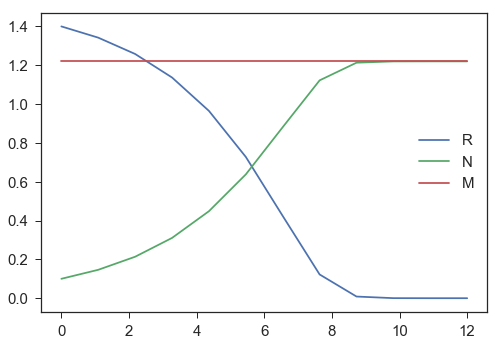

In [98]:
fig, ax = plt.subplots()
y = monod_growth(t, R0, N0, h, ε, K)
R, N = y[:,0], y[:,1]
ax.plot(t, R, '-', label='R')
ax.plot(t, N, '-', label='N')
ax.plot(t, ε*R+N, '-', label='M')
ax.legend()